In [1]:
import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
raw_set = datasets.get_rdataset("deaths",package="MASS")
raw = raw_set.data
raw

,time,value
0,1974.000000,3035
1,1974.083333,2552
2,1974.166667,2704
3,1974.250000,2554
4,1974.333333,2014
...,...,...
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781


In [4]:
raw.time = pd.date_range('1974-01-01',periods=len(raw),freq="M")
raw

,time,value
0,1974-01-31,3035
1,1974-02-28,2552
2,1974-03-31,2704
3,1974-04-30,2554
4,1974-05-31,2014
...,...,...
67,1979-08-31,1354
68,1979-09-30,1333
69,1979-10-31,1492
70,1979-11-30,1781


(-1.1, 1.1)

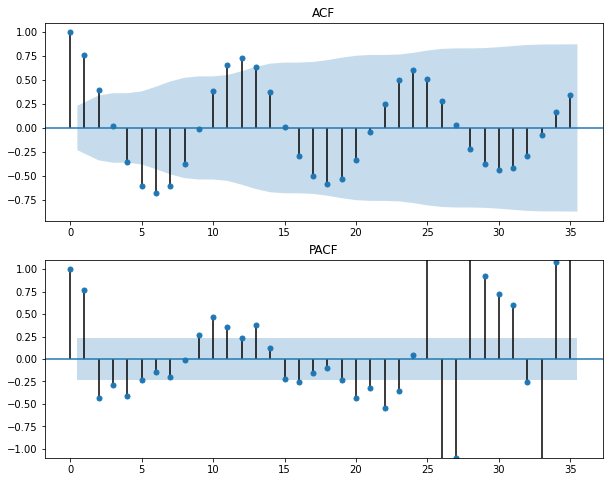

In [5]:
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(raw.value, lags=35, ax=plt.subplot(211), title="ACF")
sm.graphics.tsa.plot_pacf(raw.value, lags=35, ax=plt.subplot(212),title="PACF")
plt.ylim(-1.1, 1.1)
#plt.show()

In [6]:
from statsmodels.tsa.arima_model import ARIMA
fit=ARIMA(raw.value, order=(1,1,0)).fit()
#fit = sm.tsa.arima.ARIMA(raw.value, order=(1,1,0)).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   71
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -524.833
Method:                       css-mle   S.D. of innovations            392.472
Date:                Thu, 21 Jul 2022   AIC                           1055.666
Time:                        07:36:21   BIC                           1062.454
Sample:                             1   HQIC                          1058.366
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -17.5469     65.140     -0.269      0.788    -145.219     110.125
ar.L1.D.value     0.2889      0.114      2.539      0.013       0.066       0.512
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4610           +0.0000j            3.4610            0.0000
-----------------------------------------------------------------------------
"""